<a href="https://colab.research.google.com/github/bldev2473/AudioProcessingWithPython/blob/main/AudioProcessingWithPython_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import wave
import numpy as np
import requests

r = requests.get('https://freewavesamples.com/files/Cat-Meow.wav')

with open('Cat-Meow.wav', mode='bx') as f:
    f.write(r.content)

In [26]:
print(r.content)

b'RIFF"T\x03\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00D\xac\x00\x00\x10\xb1\x02\x00\x04\x00\x10\x00data@S\x03\x002\x00F\x00\x8c\x00\x87\x00\xf6\x00\xaa\x00\xda\x00\xbc\x00\xde\x00\xf8\x00\xd5\x00\xbf\x00\xd9\x00\x92\x00\x82\x00;\x00^\x00Y\x00S\x00K\x00\x9b\x00~\x00\x9d\x00\xa9\x00\xa7\x00\xa6\x00\xb1\x00\xb6\x00\x8b\x00\x96\x00D\x00c\x00\x1b\x00\xf2\xff\xec\xff\xaa\xff\x92\xff\x9b\xff\x9d\xff\xb7\xff\x9f\xff\xe7\xff\xb1\xff\xf0\xff-\x00\x1f\x00\x15\x00*\x00\x11\x00\x10\x00\xd9\xff\x10\x00\xc2\xff\xbc\xff]\xffi\xff\xd8\xfe(\xff\xaa\xfe\xc9\xfe\xb6\xfe\xc9\xfe\xec\xfe\x08\xffv\xff\\\xff\xdd\xff\xf0\xff\x1e\x00:\x00\x80\x00s\x00\xbc\x00p\x00s\x00>\x00\xde\xff\xfb\xff\x94\xff\xe2\xff\xa6\xff\x8b\xff\xb1\xff\xab\xff\xfb\xff/\x00\xa1\x00\x99\x00_\x01M\x01\xf5\x01\xcf\x01)\x02\xd6\x01 \x02\xb1\x01x\x01\x9c\x01=\x01"\x01\xd8\x00\xb2\x00F\x00R\x00\xe3\xff\xd6\xfft\xffk\xff1\xff(\xff\xff\xfe.\xff\xb0\xfe\x06\xff\xbb\xfe\xaf\xfe\x8a\xfe\xae\xfe\xb4\xfe\xa5\xfe9\xff \xff\xcc\xff\xc1\xffD\x00)\x0

In [21]:
file = wave.open('Cat-Meow.wav')

In [22]:
fr = file.getframerate()
print(fr)

44100


In [23]:
nframes = file.getnframes()
print(nframes)

54480


In [24]:
nchannels = file.getnchannels()
print(nchannels)

2


In [25]:
data = file.readframes(-1)
print(data)

b'2\x00F\x00\x8c\x00\x87\x00\xf6\x00\xaa\x00\xda\x00\xbc\x00\xde\x00\xf8\x00\xd5\x00\xbf\x00\xd9\x00\x92\x00\x82\x00;\x00^\x00Y\x00S\x00K\x00\x9b\x00~\x00\x9d\x00\xa9\x00\xa7\x00\xa6\x00\xb1\x00\xb6\x00\x8b\x00\x96\x00D\x00c\x00\x1b\x00\xf2\xff\xec\xff\xaa\xff\x92\xff\x9b\xff\x9d\xff\xb7\xff\x9f\xff\xe7\xff\xb1\xff\xf0\xff-\x00\x1f\x00\x15\x00*\x00\x11\x00\x10\x00\xd9\xff\x10\x00\xc2\xff\xbc\xff]\xffi\xff\xd8\xfe(\xff\xaa\xfe\xc9\xfe\xb6\xfe\xc9\xfe\xec\xfe\x08\xffv\xff\\\xff\xdd\xff\xf0\xff\x1e\x00:\x00\x80\x00s\x00\xbc\x00p\x00s\x00>\x00\xde\xff\xfb\xff\x94\xff\xe2\xff\xa6\xff\x8b\xff\xb1\xff\xab\xff\xfb\xff/\x00\xa1\x00\x99\x00_\x01M\x01\xf5\x01\xcf\x01)\x02\xd6\x01 \x02\xb1\x01x\x01\x9c\x01=\x01"\x01\xd8\x00\xb2\x00F\x00R\x00\xe3\xff\xd6\xfft\xffk\xff1\xff(\xff\xff\xfe.\xff\xb0\xfe\x06\xff\xbb\xfe\xaf\xfe\x8a\xfe\xae\xfe\xb4\xfe\xa5\xfe9\xff \xff\xcc\xff\xc1\xffD\x00)\x00\xb5\x00\xa2\x00\x17\x01\xf8\x00$\x01U\x01J\x01\x10\x01\xf2\x00\x98\x00.\x00#\x00\x92\xff\x97\xff\xfc\xfe\x16\xf

In [28]:
w_data = np.frombuffer(data, np.int16)
print(w_data)

[ 50  70 140 ...   4   0  -3]


In [29]:
w_data.shape = -1, 2
print(w_data)

[[ 50  70]
 [140 135]
 [246 170]
 ...
 [  5  -7]
 [ -1   4]
 [  0  -3]]


In [32]:
w_data = w_data.T
print(w_data)

[[ 50 140 246 ...   5  -1   0]
 [ 70 135 170 ...  -7   4  -3]]


In [35]:
print(nframes/fr)
duration = 1/fr
print(duration)

1.235374149659864
2.2675736961451248e-05


In [36]:
time_sequence = np.arange(0, nframes/fr, duration)
print(time_sequence)

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.23530612e+00
 1.23532880e+00 1.23535147e+00]


In [41]:
import matplotlib.pyplot as plt

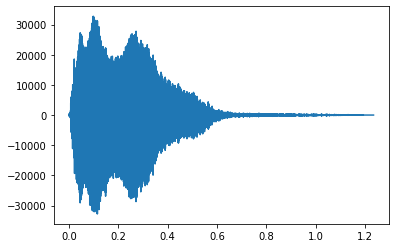

In [42]:
plt.plot(time_sequence, w_data[0])
plt.show()

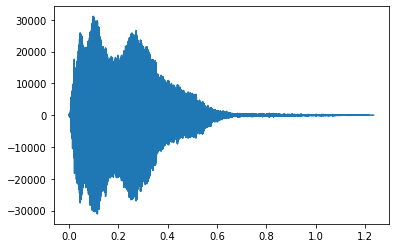

In [43]:
plt.plot(time_sequence, w_data[1])
plt.show()